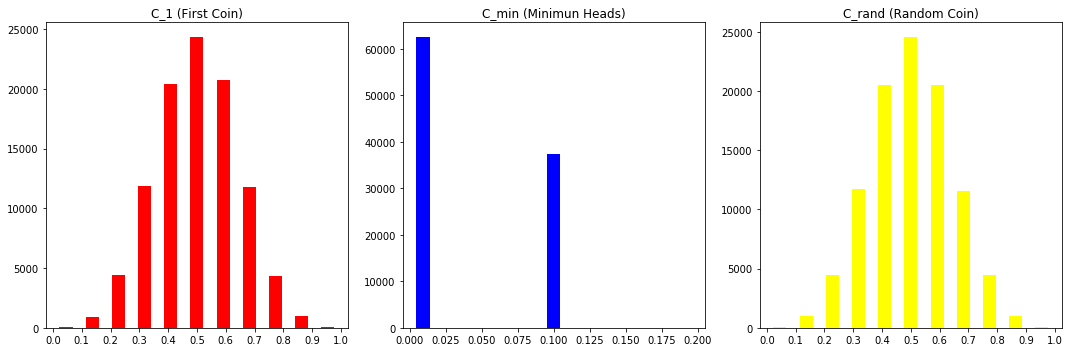

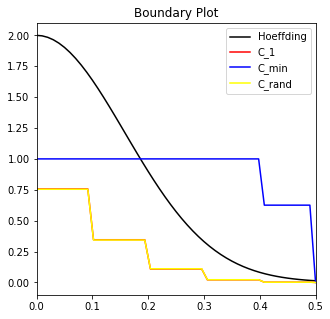

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

#create the 3 plots skeleton
fig, axs = plt.subplots(1,3, figsize=(15, 5))

coins = 1000
flips = 10
samples = 99999


firstIndexArray = np.empty([99999])
minArray = np.empty([99999])
randomArray = np.empty([99999])


for x in range(99999):
    
    data = np.random.binomial(size=flips*coins, n=1, p=0.5)
    
    #print(data.shape)

    data = data.reshape(1000,10)
    #print(data.shape)

    #print(data[:20, :])
    
    sumFlips = np.sum(data, axis = 1)
    
    firstIndex = np.sum(data[0])
    randIndex = np.random.choice(coins) # choose a coin from the M coins uniforml
    minIndex = np.argmin(sumFlips)


   


    firstIndexArray[x] = np.sum(data[0, :])/10.0
    minArray[x] = np.sum(data[minIndex, :])/10.0
    randomArray[x] = np.sum(data[randIndex, :])/10.0

    #print("c_1 is index 0 with values {} and nu_1 as {}".format(data[0, :], np.sum(data[0, :])))
    #print("c_min is index",minIndex,"with values {} and nu_min as {}".format(data[minIndex, :], np.sum(data[minIndex, :])))
    #print("c_rand is index",randIndex,"with values {} and nu_rand as {}".format(data[randIndex, :], np.sum(data[randIndex, :])))

    



n1, bins1, patches1 = axs[0].hist(firstIndexArray, 11, facecolor="red",  rwidth = 0.5)
axs[0].set_title('C_1 (First Coin)')
#plt.xticks(range(10))
axs[0].xaxis.set_ticks(np.arange(0, 1.1, 0.1))

n2, bins2, patches2 = axs[1].hist(minArray, 11, facecolor="blue", rwidth = 0.5)
axs[1].set_title('C_min (Minimun Heads)')
#axs[1].xaxis.set_ticks(np.arange(0, 10, 0.1))

n3, bins3, patches3 = axs[2].hist(randomArray, 11, facecolor="yellow",rwidth = 0.5)
axs[2].set_title('C_rand (Random Coin)')
axs[2].xaxis.set_ticks(np.arange(0, 1.1, 0.1))

fig.tight_layout()
plt.show()

eps = np.empty(100);
hoeff = np.empty(100);

for x in range(100):
    eps[x] = x/100
    hoeff[x] = 2.0 * np.exp(-2 * np.power(eps[x], 2) * flips)
    
fig, ax= plt.subplots(1,1, figsize=(5,5))
ax.plot(eps, hoeff, c='black', label = "Hoeffding")
ax.set_title("Boundary Plot")
ax.xaxis.set_ticks(np.arange(0, 0.6, 0.1))
ax.set_xlim([0,0.5])

y = lambda epsilon: 2.0*np.exp(-2*flips*epsilon**2)

def prob(nu, epsilon, samples):
    xabs = np.abs(np.asarray(nu) - 0.5)
    return np.sum(np.greater(xabs, epsilon))/float(samples)

x = np.linspace(0.0, 0.5, 50)

#c_1
probs1 = np.array([prob(firstIndexArray, x_, samples) for x_ in x])
C_1 = ax.plot(x, probs1, color='red', label="C_1")

#c_min
probs2 = np.array([prob(minArray, x_, samples) for x_ in x])
ax.plot(x, probs2, c='blue', label="C_min")

#c_rand
probs3 = np.array([prob(randomArray, x_, samples) for x_ in x])
ax.plot(x, probs3, c='yellow', label="C_rand")

plt.legend()
plt.show()
    
    
    


Write a program to flip 1000 fair coins. Flip each coin 10 times, then select three coins as follows:

    select the first coin flipped (c_1)
    Select the first coin with the minimum number of heads (c_min)
    Select another coin completely at random (c_rand)

Let nu-1, nu-min, nu-rand be the fraction of heads for the three selected coins. Let mu be the actual probability of heads.

a. What is mu for the coins?

   mu = 0.5

b. repeat the experiment a great number of times (e.g., 100,000 times). collect nu-1, nu-min, nu-rand for each experiment. Plot histograms of nu-1, nu-min, nu-rand to see what the distribution looks like. Note that the coin for c-rand and c-min will be probably different for each run.

c. plot the hoeffding bound 2 * exp(-2 * epsilon^2 * N) along with the P(| nu-mu | > epsilon) for different values of epsilon. N is the number of training examples (10 in this case), and number of hypotheses is M = 1000.

d. Which coins obey Hoeffding bound? which do not? why?

   The plot shows that C_rand and C_1 obey the Hoeffding bound by remaining underneath the curve at all times. C_min on       the other hand does not obey the bound. This is becuase both c_rand and c_1 maintain a binomial distribution from the bar graphs. it is because of this symetric-like distribution that each value of heads will not only stick to one probability. C_min on the other hand only has probabilities 0 and 0.1 which distrupts the binomial distribution therefore breaking out of the Hoeffding bound.

e. Explain how the model described here compares to the bin model described in the book and the lecture.

   The bin model in class and the book uses marbles instead of coin flips. I would assume that the mu is not the same  at 0.5 since the fraction of blue and red marbles plased wihtin the bin are different. We actuallt dont know M and will use the knowledge we have about V to find out more about M. 